<a href="https://colab.research.google.com/github/jjjonathan96/assignment_04/blob/main/assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#Question1

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)

K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0] 
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST


# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image



y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

std=1e-5
w = std*np.random.randn(Din, K)
b = np.zeros(K)
print("w:", w.shape)
print("b:", b.shape)
batch_size = Ntr


epochs =300
lr =1.4e-2
lr_decay=0.999
reg =5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)
iterations =int(Ntr/300)

for t in range(iterations):
  indices = np.arange(Ntr)
  rng.shuffle(indices)
  x=x_train[indices]
  y=y_train[indices]

  # Forward pass
  y_pred=x.dot(w)+b

  loss=1/batch_size*np.square(y_pred-y).sum()+reg*np.sum(w*w)
  loss_history.append(loss)

  train_acc=(Ntr-np.count_nonzero(np.abs(np.argmax(y,axis=1)-np.argmax(y_pred,axis=1))))/Ntr
  train_acc_history.append(train_acc)

  y_pred2=x_test.dot(w)+b
  val_acc=(Nte-np.count_nonzero(np.abs(np.argmax(y_test,axis=1)-np.argmax(y_pred2,axis=1))))/Nte
  val_acc_history.append(val_acc)



  if t%10==0:
    print('epoch %d/%d : loss %f'%(t,epochs,loss))
    print('epoch %d/%d : training accuracy %f'%(t,epochs,train_acc))


  # Backward pass
  dy_pred=1./batch_size*2.0*(y_pred-y)
  db=dy_pred.sum()
  dw=x.T.dot(dy_pred)+reg*w
  w-=lr*dw
  b-=lr*db
  lr*=lr_decay





x_train:  (50000, 32, 32, 3)
w: (3072, 10)
b: (10,)
epoch 0/300 : loss 0.999984
epoch 0/300 : training accuracy 0.100220
epoch 10/300 : loss 0.819968
epoch 10/300 : training accuracy 0.354260
epoch 20/300 : loss 0.810078
epoch 20/300 : training accuracy 0.372720
epoch 30/300 : loss 0.804963
epoch 30/300 : training accuracy 0.382080
epoch 40/300 : loss 0.801610
epoch 40/300 : training accuracy 0.388200
epoch 50/300 : loss 0.799163
epoch 50/300 : training accuracy 0.393040
epoch 60/300 : loss 0.797247
epoch 60/300 : training accuracy 0.396080
epoch 70/300 : loss 0.795672
epoch 70/300 : training accuracy 0.398720
epoch 80/300 : loss 0.794336
epoch 80/300 : training accuracy 0.401080
epoch 90/300 : loss 0.793177
epoch 90/300 : training accuracy 0.402880


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

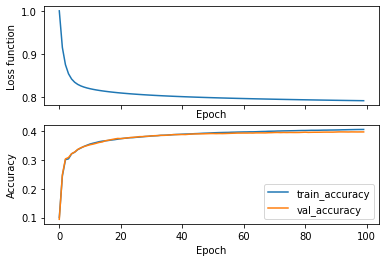

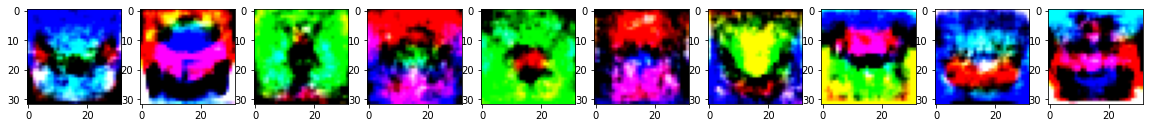

train_accuracy =  0.40476
test_accuracy =  0.3964


In [6]:
# Printing accuracies and displaying w as images
fig,axes=plt.subplots(2,1,sharex=True)
axes[0].plot(loss_history)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss function')

axes[1].plot(train_acc_history, label = 'train_accuracy')
axes[1].plot(val_acc_history, label = 'val_accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
plt.legend(loc='lower right')



fig,ax=plt.subplots(1,10)
fig.set_size_inches(20,10)

for i in range(10):
  img=w[:,i].reshape(32,32,3)
  ax[i].imshow(img*1000)
plt.show()

y_pred1=x_train.dot(w)+b
train_acc=(Ntr-np.count_nonzero(np.abs(np.argmax(y_train,axis=1)-np.argmax(y_pred1,axis=1))))/Ntr
print('train_accuracy = ',train_acc)


y_pred2=x_test.dot(w)+b
test_acc=(Nte-np.count_nonzero(np.abs(np.argmax(y_test,axis=1)-np.argmax(y_pred2,axis=1))))/Nte
print('test_accuracy = ',test_acc)



In [7]:
#Question2
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)

K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST


# Normalize pixel values
#x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image



y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

H=200
std=1e-6
w1=std*np.random.randn(Din,H)
w2=std*np.random.randn(H,K)
b1=np.zeros(H)
b2=np.zeros(K)
batch_size=Ntr

epochs =300
lr =1.4e-2
lr_decay=0.999
reg =5e-6
loss_history = []
train_acc_history = []
val_acc_history = []

for t in range(iterations):
  batch_indices = np.random.choice(Ntr,batch_size)
  x=x_train[batch_indices]
  y=y_train[batch_indices] 

  # Forward pass
  h=1.0/(1.0+np.exp(-(x.dot(w1)+b1)))
  y_pred=h.dot(w2)+b2
  loss=1./batch_size*np.square(y_pred-y).sum()+reg*(np.sum(w2*w2)+np.sum(w1*w1))
  loss_history.append(loss)

  train_acc=(Ntr-np.count_nonzero(np.abs(np.argmax(y,axis=1)-np.argmax(y_pred,axis=1))))/Ntr
  train_acc_history.append(train_acc)

  h2=1.0/(1.0+np.exp(-(x_test.dot(w1)+b1))) #sigmoid
  y_pred2=h2.dot(w2)+b2
  val_acc=(Nte-np.count_nonzero(np.abs(np.argmax(y_test,axis=1)-np.argmax(y_pred2,axis=1))))/Nte
  val_acc_history.append(val_acc)


  if t%10==0:
    print('epoch %d/%d : loss %f'%(t,epochs,loss))
    print('epoch %d/%d : training accuracy %f'%(t,epochs,train_acc))

  # Backward pass
  dy_pred=1./batch_size*2.0*(y_pred-y)
  dw2=h.T.dot(dy_pred)+reg*w2
  db2=dy_pred.sum(axis=0)
  dh=dy_pred.dot(w2.T)
  dw1=x.T.dot(dh*h*(1-h))+reg*w1
  db1=(dh*h*(1-h)).sum(axis=0)


  w1-=lr*dw1
  w2-=lr*dw2
  b1-=lr*db1
  b2-=lr*db2
  lr*=lr_decay 

x_train:  (50000, 32, 32, 3)
epoch 0/300 : loss 1.000001
epoch 0/300 : training accuracy 0.102280
epoch 10/300 : loss 1.151308
epoch 10/300 : training accuracy 0.106860
epoch 20/300 : loss 0.860826
epoch 20/300 : training accuracy 0.237040
epoch 30/300 : loss 0.841495
epoch 30/300 : training accuracy 0.285040
epoch 40/300 : loss 0.835449
epoch 40/300 : training accuracy 0.298580
epoch 50/300 : loss 0.827604
epoch 50/300 : training accuracy 0.320100
epoch 60/300 : loss 0.822416
epoch 60/300 : training accuracy 0.331580
epoch 70/300 : loss 0.812026
epoch 70/300 : training accuracy 0.350860
epoch 80/300 : loss 0.803247
epoch 80/300 : training accuracy 0.368600
epoch 90/300 : loss 0.796011
epoch 90/300 : training accuracy 0.374840


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


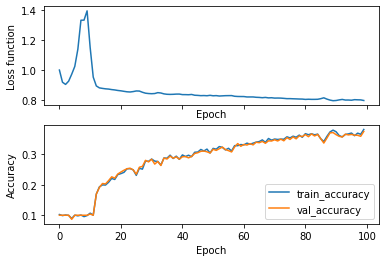

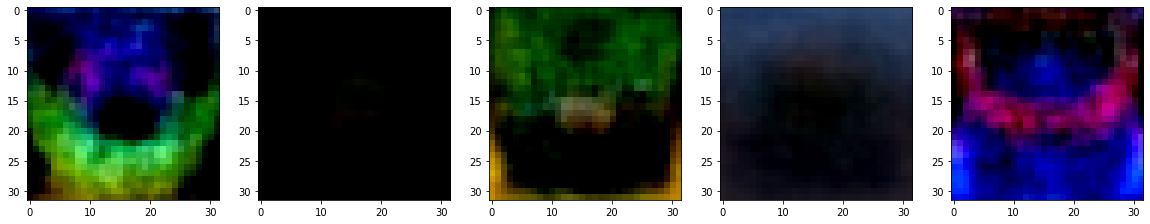

train_accuracy =  0.36772
test_accuracy =  0.3644


In [8]:
# Printing accuracies and displaying w as images
fig,axes=plt.subplots(2,1,sharex=True)
axes[0].plot(loss_history)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss function')

axes[1].plot(train_acc_history, label = 'train_accuracy')
axes[1].plot(val_acc_history, label = 'val_accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
plt.legend(loc='lower right')

fig,ax=plt.subplots(1,5)
fig.set_size_inches(20,10)

for i in range(5):
  img=w1[:,i].reshape(32,32,3)
  ax[i].imshow(img*1000)
plt.show()

h1=1.0/(1.0+np.exp(-(x_train.dot(w1)+b1))) #sigmoid
y_pred1=h1.dot(w2)+b2
train_acc=(Ntr-np.count_nonzero(np.abs(np.argmax(y_train,axis=1)-np.argmax(y_pred1,axis=1))))/Ntr
print('train_accuracy = ',train_acc)


h2=1.0/(1.0+np.exp(-(x_test.dot(w1)+b1))) #sigmoid
y_pred2=h2.dot(w2)+b2
test_acc=(Nte-np.count_nonzero(np.abs(np.argmax(y_test,axis=1)-np.argmax(y_pred2,axis=1))))/Nte
print('test_accuracy = ',test_acc)

In [ ]:
#Question3
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)

K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST


# Normalize pixel values
#x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image



y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

H=200
std=1e-6
w1=std*np.random.randn(Din,H)
w2=std*np.random.randn(H,K)
b1=np.zeros(H)
b2=np.zeros(K)
batch_size=500

epochs=300
iterations =int(Ntr/500)
lr =1.4e-2
lr_decay=0.999
reg =5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 1
for i in range(epochs):
  rng = np.random.default_rng(seed=seed)
  indices = np.arange(Ntr)
  rng.shuffle(indices)
  for t in range(iterations):
    batch_indices = indices[t*500:t*500+500]
    x=x_train[batch_indices]
    y=y_train[batch_indices] 

    # Forward pass
    h=1.0/(1.0+np.exp(-(x.dot(w1)+b1)))
    y_pred=h.dot(w2)+b2
    
    # Backward pass
    dy_pred=1./batch_size*2.0*(y_pred-y)
    dw2=h.T.dot(dy_pred)+reg*w2
    db2=dy_pred.sum(axis=0)
    dh=dy_pred.dot(w2.T)
    dw1=x.T.dot(dh*h*(1-h))+reg*w1
    db1=(dh*h*(1-h)).sum(axis=0)


    w1-=lr*dw1
    w2-=lr*dw2
    b1-=lr*db1
    b2-=lr*db2
    lr*=lr_decay
  if i%10==0:
    h1=1.0/(1.0+np.exp(-(x_train.dot(w1)+b1))) #sigmoid
    y_pred=h1.dot(w2)+b2

    loss=1./Ntr*np.square(y_pred-y_train).sum()+reg*(np.sum(w2*w2)+np.sum(w1*w1))
    loss_history.append(loss)

    train_acc=(Ntr-np.count_nonzero(np.abs(np.argmax(y_train,axis=1)-np.argmax(y_pred,axis=1))))/Ntr
    train_acc_history.append(train_acc)

    h2=1.0/(1.0+np.exp(-(x_test.dot(w1)+b1))) #sigmoid
    y_pred2=h2.dot(w2)+b2
    val_acc=(Nte-np.count_nonzero(np.abs(np.argmax(y_test,axis=1)-np.argmax(y_pred2,axis=1))))/Nte
    val_acc_history.append(val_acc)

    print('epoch %d/%d : loss %f'%(i,epochs,loss))
    print('epoch %d/%d : training accuracy %f'%(i,epochs,train_acc))
 


x_train:  (50000, 32, 32, 3)
epoch 0/300 : loss 0.796724
epoch 0/300 : training accuracy 0.377460
epoch 10/300 : loss 0.684119
epoch 10/300 : training accuracy 0.533220
epoch 20/300 : loss 0.643291
epoch 20/300 : training accuracy 0.587840
epoch 30/300 : loss 0.620766
epoch 30/300 : training accuracy 0.619620
epoch 40/300 : loss 0.609545
epoch 40/300 : training accuracy 0.634060
epoch 50/300 : loss 0.605342
epoch 50/300 : training accuracy 0.639300
epoch 60/300 : loss 0.603952
epoch 60/300 : training accuracy 0.641120
epoch 70/300 : loss 0.603491
epoch 70/300 : training accuracy 0.641800
epoch 80/300 : loss 0.603330
epoch 80/300 : training accuracy 0.641860
epoch 90/300 : loss 0.603272
epoch 90/300 : training accuracy 0.641940
epoch 100/300 : loss 0.603251
epoch 100/300 : training accuracy 0.641980
epoch 110/300 : loss 0.603244
epoch 110/300 : training accuracy 0.641960
epoch 120/300 : loss 0.603241
epoch 120/300 : training accuracy 0.641940
epoch 130/300 : loss 0.603240
epoch 130/300 

In [ ]:
# Printing accuracies and displaying w as images
fig,axes=plt.subplots(2,1,sharex=True)
axes[0].plot(np.arange(0,300,10),loss_history)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss function')

axes[1].plot(np.arange(0,300,10),train_acc_history, label = 'train_accuracy')
axes[1].plot(np.arange(0,300,10),val_acc_history, label = 'val_accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
plt.legend(loc='lower right')


fig,ax=plt.subplots(1,5)
fig.set_size_inches(20,10)

for i in range(5):
  img=w1[:,i].reshape(32,32,3)
  ax[i].imshow(img*1000)
plt.show()

h1=1.0/(1.0+np.exp(-(x_train.dot(w1)+b1))) #sigmoid
y_pred1=h1.dot(w2)+b2
train_acc=(Ntr-np.count_nonzero(np.abs(np.argmax(y_train,axis=1)-np.argmax(y_pred1,axis=1))))/Ntr
print('train_accuracy = ',train_acc)


h2=1.0/(1.0+np.exp(-(x_test.dot(w1)+b1))) #sigmoid
y_pred2=h2.dot(w2)+b2
test_acc=(Nte-np.count_nonzero(np.abs(np.argmax(y_test,axis=1)-np.argmax(y_pred2,axis=1))))/Nte
print('test_accuracy = ',test_acc)

In [ ]:
%matplotlib inline
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

model = keras.models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

print(model.summary())

model.compile(optimizer= tf.keras.optimizers.SGD(learning_rate=0.01,momentum = 0.9),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=50, batch_size = 50,validation_data=(test_images, test_labels))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels,batch_size = 50, verbose=2)
print('test accuracy : ',test_acc)